<a href="https://colab.research.google.com/github/Utyiama/ammd/blob/main/Projeto_1_Daniel_Mitsuaki_da_Silva_Utyiama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;">

<img height ="200px" src="https://iconape.com/wp-content/png_logo_vector/brasao-da-republica-do-brasil-logo.png" alt="" />
</td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Rep&uacute;blica Federativa do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img height ="200px" src="http://2016.igem.org/wiki/images/2/23/Ufam_uea_ufam.png" alt="" /></td>

</tr>
</tbody>
</table>

---

# Aprendizado de Máquina e Mineração de Dados
## Lista Prática de Análise de Dados, abril/2021

_Professor Dr. Marco Cristo_

**Aluno:**  `Daniel Mitsuaki da Silva Utyiama` <br>
**E-mail:** `daniel.utyiama@icomp.ufam.edu.br`

### Introdução

Neste trabalho vamos analisar os dados do PISA 2012. O PISA (Programme for International Student Assessment) é uma rede mundial de avaliação de desempenho escolar coordenado pela OCDE (Organização para a Cooperação e Desenvolvimento Econômico -- Organisation for Economic Co-operation and Development), com o objetivo de melhorar políticas nacionais de educação. Para tanto, testes são realizados em dezenas de países a cada três anos avaliando, em geral, a capacidade de alunos de cerca de 15 anos em Leitura (no idioma do seu país), Matemática e Ciências.

O PISA 2012 foi o 5o survey realizado, cobrindo 65 países e 510 mil estudantes com idades entre 14,5 e 16 anos. A amostra, embora imperfeita, tentou representar uma população mundial de 28 milhões de estudantes. Como é comum, seu maior foco foi em Matemática. No caso do Brasil, participaram alunos de instituições escolares públicas, particulares, rurais e urbanas, tendo sido  amostrados estudantes cursando desde a 7a. série do Ensino Fundamental até qualquer ano do Ensino Médio.

O teste em si, escrito, dura 2 horas e inclui questões discursivas e de múltipla escolha. Estudantes e diretores de escolas também responderam questionários acerca do contexto e história dos estudantes, da escola, das experiências de aprendizagem, do sistema escolar e do ambiente de aprendizagem.

Os dados a serem avalidos neste trabalho incluem, para cada aluno, informações sobre o seu desempenho no teste (já normalizados considerando idade, formação na época do teste e particularidades das amostras dos vários países) e informações associadas aos questionários respondidos. Embora vários países tenham sido avaliados em resolução criativa de problemas e educação financeira, na base explorada neste trabalho, não incluimos estes dados.

O objetivo deste trabalho é analisar os dados disponíveis, considerando amostras com um número limitado de países, e escrever um modelo de previsão para o desepenho dos alunos em Matemática. Cada amostra e países sempre inclui o Brasil (para que possamos comparar nosso desempenho em relação ao resto do mundo), a China (que teve um desempenho muito acima dos demais países, em especial, por ter usado uma amostra restrita a quatro cidades: Pequim, Xangai, Jiangsu e Zhejiang) e, pelo menos, outros 18 países dentre os demais participantes.

### Preliminares

In [ ]:
# Usar versão do Python 3.5 ou superior

# Imports
import numpy as np
import scipy.stats as stats
import pandas as pd
from tqdm.notebook import tqdm

import sklearn
import sys
import os 

import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

In [ ]:
def global_background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [ ]:
print("Python", sys.version)
print("--------")
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)
print("SKLearn:", sklearn.__version__)

Python 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
--------
Pandas: 1.1.5
Numpy: 1.19.5
SKLearn: 0.22.2.post1


De acordo com o seu nome, escolha a lista de países que corresponde à sua amostra de dados. Se você não estiver listado abaixo, solicite sua lista do professor.

In [ ]:
paises_por_aluno = {'ARTHUR BINDA ALVES': ['Bulgaria', 'New Zealand', 'Portugal', 'United Arab Emirates', 
                                           'Liechtenstein', 'Luxembourg', 'Mexico', 'China', 'Greece', 
                                           'Iceland', 'Peru', 'Spain', 'South Korea', 'Belgium', 
                                           'Israel', 'Poland', 'Canada', 'Brazil', 'Uruguay', 
                                           'Slovak Republic', 'Slovenia'], 
                    'BEATRIZ ALBUQUERQUE RODRIGUES': ['Portugal', 'Liechtenstein', 'Romania', 'Argentina', 
                                                      'China', 'Indonesia', 'Greece', 'Iceland', 
                                                      'Kazakhstan', 'United States', 'Costa Rica', 
                                                      'Czech Republic', 'Australia', 'United Kingdom', 
                                                      'Serbia', 'Estonia', 'South Korea', 'Qatar', 
                                                      'Austria', 'Canada', 'Brazil', 'Slovak Republic'], 
                    'BRAULIO HENRIQUE O UCHOA VELOSO PINTO': ['New Zealand', 'China', 'Malaysia', 'Denmark', 
                                                              'Kazakhstan', 'Thailand', 'United States', 
                                                              'Colombia', 'Australia', 'Italy', 'France', 
                                                              'Lithuania', 'Tunisia', 'Estonia', 
                                                              'South Korea', 'Belgium', 'Japan', 'Israel', 
                                                              'Canada', 'Brazil', 'Russia', 'Montenegro'], 
                    'BRENDO RODRIGO SOUZA DE MATOS': ['Bulgaria', 'Portugal', 'United Arab Emirates', 
                                                      'Albania', 'Mexico', 'China', 'Malaysia', 
                                                      'Greece', 'Iceland', 'United States', 'Germany', 
                                                      'Czech Republic', 'Italy', 'Latvia', 'United Kingdom', 
                                                      'Estonia', 'Qatar', 'Taiwan', 'Japan', 'Israel', 
                                                      'Canada', 'Brazil'], 
                    'DANIEL MITSUAKI DA SILVA UTYIAMA': ['United Arab Emirates', 'Albania', 'China', 
                                                         'Denmark', 'Turkey', 'Thailand', 'United States', 
                                                         'Colombia', 'Costa Rica', 'Ireland', 
                                                         'Czech Republic', 'Italy', 'Latvia', 'Japan', 
                                                         'Taiwan', 'Israel', 'Poland', 'Vietnam', 
                                                         'Canada', 'Brazil', 'Uruguay', 'Russia'], 
                    'KATIELY DOS SANTOS OLIVEIRA MOREIRA': ['Netherlands', 'Croatia', 'United Arab Emirates', 
                                                            'Liechtenstein', 'Albania', 'Luxembourg', 
                                                            'Chile', 'China', 'Peru', 'Costa Rica', 
                                                            'Australia', 'Latvia', 'United Kingdom', 
                                                            'Lithuania', 'Belgium', 'Finland', 'Austria', 
                                                            'Brazil', 'Hungary', 'Slovenia', 'Montenegro'], 
                    'LENNON CORREA CHAVES': ['Romania', 'Luxembourg', 'Mexico', 'Argentina', 'China', 
                                             'Turkey', 'Peru', 'Thailand', 'Czech Republic', 'Australia', 
                                             'France', 'Serbia', 'Norway', 'Qatar', 'Japan', 'Finland', 
                                             'Poland', 'Austria', 'Brazil', 'Russia', 'Slovenia'], 
                    'LETICIA CARVALHO PASSOS': ['Croatia', 'New Zealand', 'United Arab Emirates', 
                                                'Liechtenstein', 'Romania', 'Argentina', 'China', 
                                                'Indonesia', 'United States', 'Costa Rica', 'Spain', 
                                                'Czech Republic', 'Italy', 'Latvia', 'Lithuania', 
                                                'Tunisia', 'South Korea', 'Belgium', 'Norway', 
                                                'Vietnam', 'Brazil', 'Sweden'], 
                    'MARIA LUISA PEREIRA BRAGA': ['Bulgaria', 'New Zealand', 'Singapore', 'Chile', 
                                                  'China', 'Malaysia', 'Turkey', 'Iceland', 'Colombia', 
                                                  'Ireland', 'Italy', 'Serbia', 'Estonia', 'South Korea', 
                                                  'Belgium', 'Qatar', 'Finland', 'Brazil', 
                                                  'Slovak Republic', 'Hungary', 'Slovenia', 'Montenegro'], 
                    'MARIELA MIZOTA TAMADA': ['Netherlands', 'Croatia', 'Bulgaria', 'Argentina', 'China', 
                                              'Indonesia', 'Greece', 'Thailand', 'Ireland', 'Spain', 
                                              'United Kingdom', 'Estonia', 'Norway', 'Taiwan', 'Vietnam', 
                                              'Canada', 'Brazil', 'Uruguay', 'Hungary', 'Russia', 'Jordan'], 
                    'MICHAEL MARLON FIGUEIRA DA COSTA': ['Netherlands', 'Croatia', 'Bulgaria', 'Singapore',
                                                         'Mexico', 'Chile', 'China', 'Costa Rica', 
                                                         'Czech Republic', 'Latvia', 'France', 
                                                         'United Kingdom', 'Serbia', 'Tunisia', 'Norway', 
                                                         'Taiwan', 'Finland', 'Austria', 'Brazil', 
                                                         'Russia', 'Slovenia'], 
                    'MILKA ROMÃO BEZERRA PAHETA': ['Netherlands', 'Croatia', 'New Zealand', 'Singapore', 
                                                   'Albania', 'Luxembourg', 'Chile', 'China', 'Malaysia', 
                                                   'Thailand', 'Colombia', 'Ireland', 'Spain', 
                                                   'Czech Republic', 'Italy', 'Lithuania', 'South Korea', 
                                                   'Austria', 'Brazil', 'Uruguay', 'Russia', 'Slovenia'], 
                    'PABLO DIEGO DE AZEVEDO QUIROGA': ['Croatia', 'Bulgaria', 'New Zealand', 'Portugal', 
                                                       'Singapore', 'Albania', 'Luxembourg', 'Argentina', 
                                                       'China', 'Denmark', 'Iceland', 'Thailand', 'France', 
                                                       'Tunisia', 'South Korea', 'Belgium', 'Israel', 
                                                       'Vietnam', 'Switzerland', 'Brazil', 'Uruguay', 'Sweden'], 
                    'SAMANTHA CORRÊA LEITE': ['United Arab Emirates', 'Singapore', 'Chile', 'China', 'Denmark', 
                                              'Turkey', 'Iceland', 'Peru', 'Costa Rica', 'Ireland', 
                                              'Czech Republic', 'United Kingdom', 'Serbia', 'South Korea', 
                                              'Belgium', 'Vietnam', 'Austria', 'Brazil', 'Uruguay', 
                                              'Sweden', 'Slovenia'], 
                    'SANDRO BESSA DE LIMA': ['Netherlands', 'Croatia', 'New Zealand', 'Portugal', 
                                             'United Arab Emirates', 'Romania', 'Argentina', 'China', 
                                             'Iceland', 'Colombia', 'Australia', 'United Kingdom', 
                                             'South Korea', 'Norway', 'Qatar', 'Taiwan', 'Israel', 
                                             'Poland', 'Austria', 'Brazil', 'Sweden', 'Montenegro'], 
                    'SANDRO DA CRUZ MARUXO': ['Netherlands', 'Bulgaria', 'New Zealand', 'Portugal', 
                                              'Singapore', 'Albania', 'Luxembourg', 'Chile', 'China', 
                                              'Malaysia', 'Greece', 'Ireland', 'Czech Republic', 
                                              'France', 'United Kingdom', 'Taiwan', 'Israel', 
                                              'Vietnam', 'Brazil', 'Uruguay', 'Hungary'], 
                    'TAINA GONCALVES DO CARMO FELIX': ['Netherlands', 'Romania', 'Argentina', 'China', 
                                                       'Denmark', 'Greece', 'Thailand', 'Costa Rica', 
                                                       'Latvia', 'France', 'Tunisia', 'Estonia', 'Qatar',
                                                       'Japan', 'Finland', 'Israel', 'Austria', 'Brazil', 
                                                       'Slovak Republic', 'Russia', 'Slovenia'], 
                    'VICTOR BELTRÃO VALENTE DUARTE': ['Bulgaria', 'United Arab Emirates', 'Liechtenstein', 
                                                      'Singapore', 'Mexico', 'China', 'Indonesia', 
                                                      'Turkey', 'Peru', 'United States', 'Czech Republic', 
                                                      'Latvia', 'France', 'United Kingdom', 'Lithuania', 
                                                      'Finland', 'Switzerland', 'Canada', 'Brazil', 
                                                      'Uruguay', 'Slovak Republic', 'Hungary'], 
                    'WÊNNIO KELSON FRANCISCO DE OLIVEIRA': ['United Arab Emirates', 'Liechtenstein', 'Mexico', 
                                                            'China', 'Indonesia', 'Denmark', 'Greece', 
                                                            'Thailand', 'United States', 'Ireland', 
                                                            'Czech Republic', 'France', 'Serbia', 
                                                            'Estonia', 'Norway', 'Taiwan', 'Finland', 
                                                            'Vietnam', 'Brazil', 'Russia', 'Montenegro'], 
                    'WILSON ARAUJO DE OLIVEIRA NETO': ['United Arab Emirates', 'Luxembourg', 'Argentina', 
                                                       'Chile', 'China', 'Greece', 'Turkey', 'Costa Rica', 
                                                       'Australia', 'Latvia', 'United Kingdom', 'South Korea', 
                                                       'Belgium', 'Taiwan', 'Finland', 'Vietnam', 'Switzerland', 
                                                       'Brazil', 'Sweden', 'Jordan', 'Slovenia'], 
                    'OZIEL SENIOR COELHO MORAES': ['United Kingdom', 'Bulgaria', 'Colombia', 'China', 'Thailand', 
                                                   'Greece', 'Argentina', 'Brazil', 'France', 'Mexico', 'Poland', 
                                                   'Netherlands', 'South Korea', 'Vietnam', 'Iceland', 'Finland', 
                                                   'Slovenia', 'Jordan', 'Luxembourg', 'United States', 'Croatia'],
                    'STEFANE REGO GANDRA': ['Serbia', 'Bulgaria', 'Montenegro', 'China', 'Thailand', 
                                            'Slovak Republic', 'Argentina', 'Brazil', 'Norway', 'Belgium', 
                                            'Hungary', 'Tunisia', 'Taiwan', 'Albania', 'Spain', 'Canada', 'Sweden', 
                                            'Czech Republic', 'Liechtenstein', 'Croatia', 'Austria', 'Latvia'],
                    'ROSANA NORONHA': ['Thailand', 'Albania', 'China', 'Iceland', 'Portugal', 'Colombia', 
                                       'Croatia', 'Costa Rica', 'Japan', 'United States', 'Israel', 'Brazil', 
                                       'Italy', 'Czech Republic', 'Austria', 'Spain', 'Poland', 'Kazakhstan', 
                                       'Mexico', 'Luxembourg', 'Canada']}

A seguir, são abertos os dois arquivos a serem usados neste trabalho: (1) os dados do PISA 2012 selecionados para uso; e (2) a descrição das 105 variáveis usadas para descrever cada estudante.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pisa0 = pd.read_csv('data/pisa2012_tp1_2021.csv')
pisa0 = pd.read_csv('/content/drive/MyDrive/2. AMMD/Projeto 1/data/pisa2012_tp1_2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (77,78,79,80,81,82,83,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pisa_dict = pd.read_csv('/content/drive/MyDrive/2. AMMD/Projeto 1/data/pisa2012_tp1_2021_vardescs.csv')
with pd.option_context('display.max_rows', None):  
    display(pisa_dict)

,varname,desc
0,CNT,Country name
1,OECD,OECD country?
2,ST01Q01,International Grade
3,ST03Q01,Birth - Month
4,ST03Q02,Birth - Year
5,ST04Q01,Genre
6,ST07Q01,Repeat - ISCED1 (1o-5o ano Brasil)
7,ST07Q02,Repeat - ISCED2 (6o-9o ano Brasil)
8,ST08Q01,Truancy - Late for School
9,ST09Q01,Truancy - Skip whole school day


O dicionário abaixo pode ser usado para descrever quaisquer variável.

In [ ]:
pisa_desc = dict(zip(list(pisa_dict['varname'].values), list(pisa_dict['desc'].values)))

# ex: qual o significado da variável ST28Q01
pisa_desc['ST28Q01']

'How many books at home'

A seguir você deve fazer a amostragem a ser usada. Basta colocar o seu nome como ele aparece no dicionário `paises_por_aluno` e rodar a célula a seguir (se o seu nome não aparece em `paises_por_aluno`, solicite uma amostra de países do professor):

In [ ]:
aluno = 'DANIEL MITSUAKI DA SILVA UTYIAMA' # <-- coloque o seu nome aqui, conforme aparece em paises_por_aluno
countries = paises_por_aluno[aluno]

pisa = pisa0[pisa0.CNT.isin(countries)].copy()

A partir deste ponto, o dataframe `pisa` tem o conjunto de dados a serem usados.

In [ ]:
#Funções que serão utilizadas
from IPython.display import Image, display, display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

## Checando Dados Faltantes

<div class="alert alert-info">
    <b>1</b> - Quais colunas possuem campos nulos em <code>pisa</code>?
</div>

**OBS**: Há muitas formas de fazer isso em Pandas, como por exemplo através da utilização do método `isnull()`. 

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : As colunas que possuem valores nulos em pisa são: <br> EC03Q09, EC03Q04, EC03Q03, EC03Q01, IC22Q08, IC11Q03, IC11Q05, IC10Q07, IC10Q08, IC10Q04, IC10Q05, IC09Q01, IC08Q08, IC08Q03, IC08Q11, IC01Q06, IC02Q07, IC01Q09, IC01Q10, IC02Q04, IC01Q04, IC03Q01, ST71Q01, ST57Q02, ST57Q04, ST57Q03, ST57Q05, ST70Q03, ST57Q06, ST70Q01, ST72Q01, ST70Q02, ST57Q01, ST91Q06, ST62Q04, ST62Q15, ST62Q10, ST62Q16, ST62Q12, ST62Q01, ST104Q04, ST62Q03, ST62Q07, ST62Q06, ST62Q17, ST104Q06, ST104Q05, ST104Q01, ST101Q03, ST101Q05, ST62Q02, ST101Q02, ST62Q09, ST84Q03, ST96Q03, ST82Q03,  ST62Q19, ST96Q05, ST96Q01, ST94Q10, ST94Q14, ST42Q03, ST94Q06, ST93Q03,  ST42Q04, ST42Q09, ST42Q06, ST42Q08, ST42Q05, ST42Q07, ST93Q01, ST42Q02,  ST44Q08, ST43Q06, ST79Q04, ST79Q07,  ST79Q10, ST44Q01,  ST07Q02, ST07Q01,  ST17Q01, ST19Q01, ST27Q05, ST13Q01,  ST15Q01, ST27Q04,  ST26Q01, ST26Q06,  ST26Q04, ST27Q03, ST28Q01, ST09Q01 e  ST08Q01.
</div>


In [ ]:
# Apresenta a distribuição em porcentagem das colunas que possuem valores nulos em pisa
print((pisa.isna().sum()/pisa.shape[0]).sort_values(ascending = False)[:50],'', (pisa.isna().sum()/pisa.shape[0]).sort_values(ascending = False)[49:])


EC03Q09     0.591569
EC03Q04     0.591239
EC03Q03     0.591194
EC03Q01     0.590914
IC22Q08     0.484025
IC11Q03     0.483675
IC11Q05     0.483625
IC10Q07     0.481216
IC10Q08     0.480867
IC10Q04     0.480627
IC10Q05     0.480552
IC09Q01     0.476993
IC08Q08     0.476829
IC08Q03     0.476729
IC08Q11     0.475879
IC01Q06     0.473855
IC02Q07     0.473635
IC01Q09     0.469612
IC01Q10     0.468667
IC02Q04     0.468637
IC01Q04     0.468507
IC03Q01     0.467488
ST71Q01     0.463165
ST57Q02     0.442440
ST57Q04     0.417916
ST57Q03     0.410350
ST57Q05     0.400685
ST70Q03     0.399290
ST57Q06     0.398696
ST70Q01     0.385212
ST72Q01     0.385167
ST70Q02     0.382049
ST57Q01     0.376896
ST91Q06     0.363937
ST62Q04     0.362908
ST62Q15     0.362803
ST62Q10     0.362723
ST62Q16     0.362418
ST62Q12     0.362318
ST62Q01     0.362168
ST104Q04    0.362048
ST62Q03     0.362023
ST62Q07     0.361908
ST62Q06     0.361683
ST62Q17     0.361653
ST104Q06    0.361603
ST104Q05    0.361168
ST104Q01    0

<div class="alert alert-info">
    <b>2</b> - Substitua dados faltantes de variáveis numéricas por valores razoáveis. No caso de variáveis reais, substitua pela média. Se elas forem inteiras, substitua pela moda. <b>Ignore as variáveis PV1MATH, PV1READ e PV1SCIE</b>.
</div>

In [ ]:
# pisa.info()
pisa['ST57Q03'].describe().mean()

14752.517252303229

In [ ]:
pisa2 = pisa.copy()
# Fução que substitui de acordo com o tipo da coluna
def replaceValue (dataset, columns):
  for column in columns:
    if ((dataset[column].dtype == 'int64') or (dataset[column].dtype == 'float64')):
      #Substituição pela média
      dataset[column].fillna(round(dataset[column].mean(),0), inplace = True)
      # dataset[column].fillna(dataset[column].describe().mean(), inplace = True)
    elif (dataset[column].dtype == 'O' or dataset[column].dtype == 'object'):
      #Substituição pela norma
      dataset[column].fillna(dataset[column].describe().top, inplace = True)
      # print(dataset[column].dtype)
    else:
      print("Erro:>>",dataset[column].dtype," not found.")
  return dataset
# Ignora as variáveis PV1MATH, PV1READ e PV1SCIE 
columns = pisa.isnull().drop(columns=['PV1MATH', 'PV1READ', 'PV1SCIE']).columns.tolist()

<div class="alert alert-info" align='justify'>
    <b>Resposta</b> : Após substituirmos os dados faltantes de variáveis numéricas por valores razoáveis. Onde, se as variáveis fossem do tipo <code>float</code> ou <code>int</code> eram substituída pela média e se <code>objetc</code> pela moda. Também foi ignorado as variáveis PV1MATH, PV1READ e PV1SCIE.  Obtemos o dataset <b>pisa2</b>, como mostrado na célula seguinte. 
</div>

In [ ]:
# Executa
pisa2 = replaceValue (pisa2, columns)

In [ ]:
 # Apresenta a distribuição em porcentagem
(pisa2.isnull().sum()/pisa2.shape[0]).sort_values(ascending = False)

PV1SCIE     0.0
ST70Q01     0.0
ST42Q08     0.0
ST42Q09     0.0
ST43Q06     0.0
           ... 
ST101Q05    0.0
ST104Q01    0.0
ST104Q04    0.0
ST104Q05    0.0
CNT         0.0
Length: 105, dtype: float64

## Analisando Dados

<div class="alert alert-info">
<b>3</b> - Considerando o desempenho médio dos alunos em Matemática, Leitura e Ciências (PV1MATH, PV1READ e PV1SCIE), como os países se saíram? Em particular quais são os 2 países de melhor média geral e os 2 de pior média geral?
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Considerando o desempenho médio dos alunos em Matemática, Leitura e Ciências foi identificado que os alunos da <b>Albânia</b> obtiveram a <b>pior média</b> nas três áreas e que <b>um</b> chinês possui a <b>segunda menor média</b> em Matemática, porém, as <b>duas melhores</b>  médias em Matemática também <b>pertencem à alunos chineses</b>. Ainda, foi identificado que <b>as maiores médias em Leitura e Ciência pertencem à alunos japoneses</b>. As células <code>as próximas células</code> apresentam como as informações foram obtidas.
</div>

In [ ]:
# Países que estiveram entre as piores médias na média geral (os dois primeiros) em Matemática, Leitura e Ciência:
minMath = pisa2.query('PV1MATH >= PV1MATH.min() & PV1MATH <= PV1MATH.mean()').sort_values(by='PV1MATH' ,ascending=True).head(2)[['CNT','PV1MATH']]
minRead = pisa2.query('PV1READ >= PV1READ.min() & PV1READ <= PV1READ.mean()').sort_values(by='PV1READ' ,ascending=True).head(2)[['CNT','PV1READ']]
minScie = pisa2.query('PV1SCIE >= PV1SCIE.min() & PV1SCIE <= PV1SCIE.mean()').sort_values(by='PV1SCIE' ,ascending=True).head(2)[['CNT','PV1SCIE']]
display_side_by_side(minMath, minRead, minScie)

,CNT,PV1MATH
1238,Albania,62.4007
310572,China,67.2301
,CNT,PV1READ
727,Albania,0.0834
1438,Albania,0.0834
,CNT,PV1SCIE
3722,Albania,39.668
160,Albania,40.787


In [ ]:
# Países que estiveram entre as melhores médias na média geral (os dois primeiros) em Matemática, Leitura e Ciência:
maxMath = pisa2.query('PV1MATH >= PV1MATH.mean() & PV1MATH <= PV1MATH.max()').sort_values(by='PV1MATH' ,ascending=False).head(2)[['CNT','PV1MATH']]
maxRead = pisa2.query('PV1READ >= PV1READ.mean() & PV1READ <= PV1READ.max()').sort_values(by='PV1READ' ,ascending=False).head(2)[['CNT','PV1READ']]
maxScie =pisa2.query('PV1SCIE >= PV1SCIE.mean() & PV1SCIE <= PV1SCIE.max()').sort_values(by='PV1SCIE' ,ascending=False).head(2)[['CNT','PV1SCIE']]
display_side_by_side(maxMath, maxRead, maxScie)

,CNT,PV1MATH
402323,China,962.2293
402334,China,928.1897
,CNT,PV1READ
283622,Japan,904.8026
282752,Japan,889.2587
,CNT,PV1SCIE
279963,Japan,879.0936
283622,Japan,871.7270


<div class="alert alert-info">
<b>4</b> - Como se comparam as distribuições de probabilidade para cada uma das notas dadas (PV1MATH, PV1READ e PV1SCIE) entre os países membros e os não membros da OCDE? Que grupos de países (OCDE ou não OCDE) se saíram melhor em cada caso?
</div>

<!-- <div class="alert alert-info" align="justify">
    <b>R</b> : Os dois <b>países membros da OCDE</b>, que tiveram as melhores distribuições de probabilidade para os exames de PV1MATH, PV1READ e PV1SCIE foram respectivamente: <code> <b>Poland</b> (PV1MATH = '11,30%', PV1READ = '11,31%' e PV1SCIE = '11,47%') </code>  e <code> Ireland (PV1MATH = '9,98%', PV1READ = '10,43%' e PV1SCIE = '10,40%') </code>. Com relação aos <b>países não membros da OCDE</b>, os dois países que tiveram  as melhores distribuições de probabilidade para os exames de PV1MATH, PV1READ e PV1SCIE foram respectivamente <code> Latvia (PV1MATH = '11,50%', PV1READ = '11,50%' e PV1SCIE = '11,75') </code> e <code>  Vietnam (PV1MATH = '10,36%', PV1READ = '10,31%' e PV1SCIE = '10,71') </code>. Deste modo, é possível observar que o grupo de países que se saiu melhor foi os países não membros da OCDE.
</div> -->
<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Com base nos histogramas abaixo é possível observar que o grupo <b>de países membros da OCDE</b> tiveram as melhores notas para os exames de <code>PV1READ</code> e <code>PV1SCIE</code>, porém para o exame <code>PV1MATH</code> os países <b>não participantes da OCDE</b> obtiveram maior pontuação. 
</div>

In [ ]:
pisa2MaskOecd = pisa2['OECD'] == 'OECD'
filteredPisa2Oecd = pisa2[pisa2MaskOecd]

pisa2MaskNoOecd = pisa2['OECD'] == 'Non-OECD'
filteredPisa2NoOecd = pisa2[pisa2MaskNoOecd]

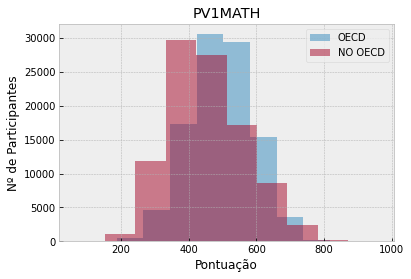

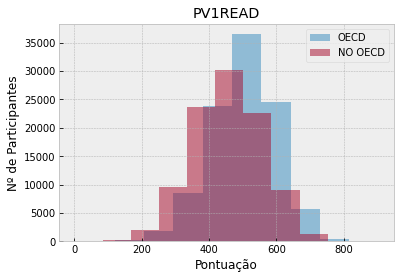

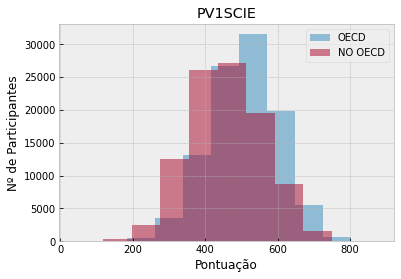

In [ ]:
# Exame PV1MATH 
plt.style.use("bmh")
x = filteredPisa2Oecd['PV1MATH']
y = filteredPisa2NoOecd['PV1MATH']

plt.hist(x, alpha=0.5, label = 'OECD')
plt.hist(y, alpha=0.5, label = 'NO OECD')
plt.legend(loc='upper right')
plt.title('PV1MATH')
plt.xlabel('Pontuação')
plt.ylabel('Nº de Participantes')
# plt.savefig('PV1MATH')
plt.show()

# Exame PV1READ 
x = filteredPisa2Oecd['PV1READ']
y = filteredPisa2NoOecd['PV1READ']

plt.hist(x, alpha=0.5, label = 'OECD')
plt.hist(y, alpha=0.5, label = 'NO OECD')
plt.legend(loc='upper right')
plt.title('PV1READ')
plt.xlabel('Pontuação')
plt.ylabel('Nº de Participantes')
# plt.savefig('PV1READ')
plt.show()

# Exame PV1SCIE
x = filteredPisa2Oecd['PV1SCIE']
y = filteredPisa2NoOecd['PV1SCIE']

plt.hist(x, alpha=0.5, label = 'OECD')
plt.hist(y, alpha=0.5, label = 'NO OECD')
plt.legend(loc='upper right')
plt.title('PV1SCIE')
plt.xlabel('Pontuação')
plt.ylabel('Nº de Participantes')
# plt.savefig('PV1SCIE')
plt.show()



<div class="alert alert-info">
<b>5</b> - É interessante verificar se há diferenças entre homens ou mulheres em cada uma das grandes áreas de interesse do PISA (linguagem, matemática e ciências). Assim, responda: <ol>
    <li> Como é o desempenho de homens e mulheres em cada uma das áreas considerando a totalidade dos países? Ou seja, mostre as distribuições de probabilidades comparadas de homens e mulheres para cada uma das áreas considerando todos os países.    
    <li> Em que país esta diferença é menor e em qual é maior?
    </ol>
</div>

<div align='justify'>
5.1 <b>Resposta</b> : Com relação as diferenças entre os homens e mulheres com relação às grandes áreas de interesse do PISA é possível observar que os homens obtiveram maior pontução nos exames: <code>PV1MATH</code> e <code>PV1SCIE</code>, enquanto as mulheres obtiveram a maior potução em <code>PV1READ</code>. </div>

<div align='justify'>
5.2 <b>Resposta</b> : Em <code><b>Israel</b></code> a diferença de pontos entre homens e mulheres foi a menor, já em <code><b>United Arab Emirates</b></code> as mulheres obtiveram as maiores pontuações e na <code><b>Colômbia</b></code> os homens obtiveram a maior portuação. </div>

In [ ]:
maskGenreFemale = pisa2['ST04Q01'] == 'Female'
filteredPisa2Female= pisa2[maskGenreFemale]
maskGenreMale = pisa2['ST04Q01'] == 'Male'
filteredPisa2Male= pisa2[maskGenreMale]

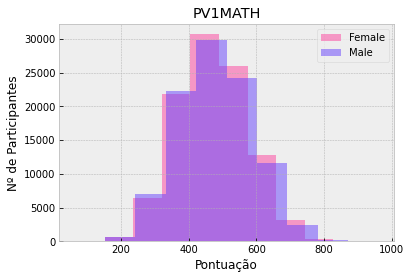

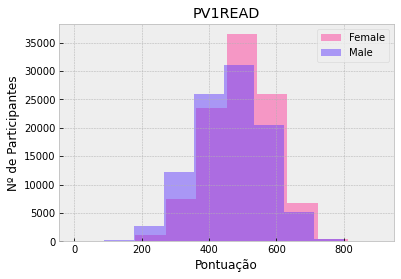

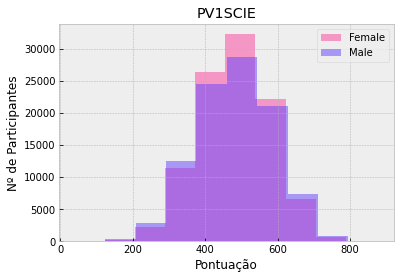

In [ ]:
# Resolução para o primeiro ponto da questão 5
# Exame PV1MATH 
plt.style.use("bmh")
x = filteredPisa2Female['PV1MATH']
y = filteredPisa2Male['PV1MATH']

plt.hist(x, alpha=0.5, label = 'Female', color = '#FD429D')
plt.hist(y, alpha=0.5, label = 'Male', color = '#6542FD')
plt.legend(loc='upper right')
plt.title('PV1MATH')
plt.xlabel('Pontuação')
plt.ylabel('Nº de Participantes')
# plt.savefig('PV1MATH')
plt.show()

# Exame PV1READ 
x = filteredPisa2Female['PV1READ']
y = filteredPisa2Male['PV1READ']

plt.hist(x, alpha=0.5, label = 'Female', color = '#FD429D')
plt.hist(y, alpha=0.5, label = 'Male', color = '#6542FD')
plt.legend(loc='upper right')
plt.title('PV1READ')
plt.xlabel('Pontuação')
plt.ylabel('Nº de Participantes')
# plt.savefig('PV1READ')
plt.show()

# Exame PV1SCIE
x = filteredPisa2Female['PV1SCIE']
y = filteredPisa2Male['PV1SCIE']

plt.hist(x, alpha=0.5, label = 'Female', color = '#FD429D')
plt.hist(y, alpha=0.5, label = 'Male', color = '#6542FD')
plt.legend(loc='upper right')
plt.title('PV1SCIE')
plt.xlabel('Pontuação')
plt.ylabel('Nº de Participantes')
# plt.savefig('PV1SCIE')
plt.show()

In [ ]:
# Resolução para o segundo ponto da questão 5
female = (filteredPisa2Female[['CNT', 'PV1MATH','PV1READ','PV1SCIE']].groupby('CNT').sum())/filteredPisa2Female[['CNT', 'PV1MATH','PV1READ','PV1SCIE']].groupby('CNT').count()
male = (filteredPisa2Male[['CNT', 'PV1MATH','PV1READ','PV1SCIE']].groupby('CNT').sum())/filteredPisa2Male[['CNT', 'PV1MATH','PV1READ','PV1SCIE']].groupby('CNT').count()
dif = female - male
dif['SUM'] = dif['PV1MATH']+dif['PV1READ']+dif['PV1SCIE'] 

dif['SUM'].describe()

dif.sort_values(by = ['SUM'], ascending = True)
display_side_by_side(female,male,dif)



,PV1MATH,PV1READ,PV1SCIE
CNT,,,
Albania,394.909127,402.816095,400.846526
Brazil,374.125981,414.378592,394.032508
Canada,505.068733,529.374147,513.943460
China,567.075268,555.054238,549.942772
Colombia,372.632528,421.589186,398.693190
Costa Rica,394.521885,451.751323,423.981920
Czech Republic,513.662622,532.175570,526.297687
Denmark,479.150287,499.628015,476.815832
Ireland,493.271801,537.990687,519.542638


<div class="alert alert-info">
<b>6</b> - Em que grupos de países (OCDE e não OCDE) o grau de instrução dos pais é maior, em geral? 
    <br><br> Observe que nesta coleção, a educação da mãe e do pai são codificados pelas variáveis ST13Q01 e ST17Q01 respectivamente. Estas variáveis registram o grau de instrução usando o código internacional ISCED (International Standard Classification of Education). Para calcular o grau de instrução agregado, inicialmente, mapeie os valores destas variáveis para os inteiros de 0 a 4, como dado a seguir:<ul>
    <li>0 = He/She did not complete ISCED level 1
    <li>1 = ISCED level 1 (primário no Brasil)
    <li>2 = ISCED level 2 (secundário no Brasil)
    <li>3 = ISCED level 3B, 3C (superior mais focado em formação profissional)
    <li>4 = ISCED level 3A (superior que dá acesso a mestrado, doutorado)
    </ul>
<br> O grau de instrução agregado dos pais devem então ser estimado como a soma dos valores dados para o pai e para a mãe. Por exemplo, dado um certo aluno A, se seu pai tem grau de instrução 2 e sua mãe 4, o valor agregado associado com A será 2+4 = 6. 
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : O grau de instrução dos pais é <b>maior</b> nos países que <b>fazem parte da OCDE</b>. As próximas células apresentam os passos de como a infomação foi obtida e o gráfico para comparação dos valores. 
</div>

In [ ]:
pisa2['ST13Q01'] = pisa2['ST13Q01'].map({ 'She did not complete <ISCED level 1> ': 0,
                                          '<ISCED level 1> ': 1, 
                                          '<ISCED level 2> ': 2, 
                                          '<ISCED level 3B, 3C> ': 3, 
                                          '<ISCED level 3A> ': 4},
                                          na_action=None)

pisa2['ST17Q01'] = pisa2['ST17Q01'].map({ 'He did not complete <ISCED level 1> ': 0,
                                          '<ISCED level 1> ': 1, 
                                          '<ISCED level 2> ': 2, 
                                          '<ISCED level 3B, 3C> ': 3, 
                                          '<ISCED level 3A> ': 4},
                                          na_action=None)
pisa2['ST13Q01'] = pisa2['ST13Q01'].astype(int)
pisa2['ST17Q01'] = pisa2['ST17Q01'].astype(int)

In [ ]:
# Cria uma coluna para o grau de instrução agregado dos pais (AGG_VALUE)
pisa2['AGG_VALUE'] = pisa2['ST13Q01'] + pisa2['ST17Q01'] 

In [ ]:
# Gráficos dos grupos de países (OCDE e não OCDE) com base no grau de instrução dos pais
aggValueOECD = pisa2[['CNT','AGG_VALUE']][pisa2['OECD'] == 'OECD'].sort_values(by='AGG_VALUE', ascending = False) 
aggValueNoOECD = pisa2[['CNT','AGG_VALUE']][pisa2['OECD'] == 'Non-OECD'].sort_values(by='AGG_VALUE', ascending = False)

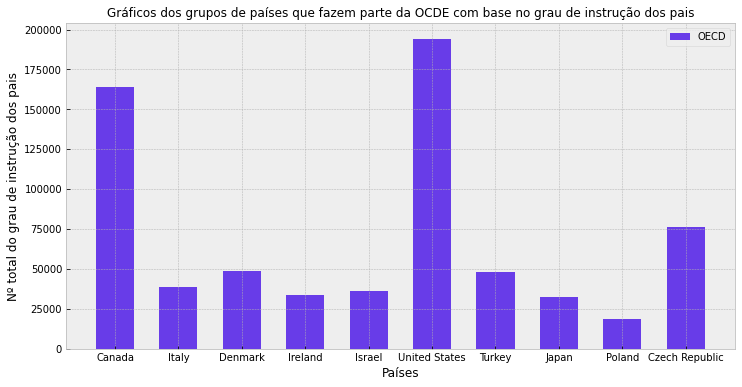

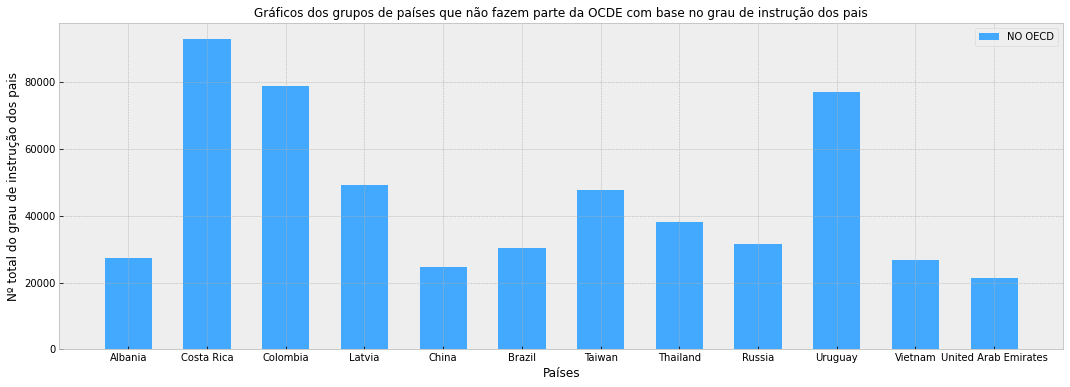

In [ ]:
# Gráficos dos grupos de países que fazem parte da OCDE com base no grau de instrução dos pais
plt.style.use("bmh")
plt.figure(figsize=(12, 6))

plt.title(label = "Gráficos dos grupos de países que fazem parte da OCDE com base no grau de instrução dos pais", 
          fontsize = 12)
plt.xlabel('Países')
plt.ylabel('Nº total do grau de instrução dos pais')

countries = aggValueOECD['CNT'].unique()
aggvalue = aggValueOECD.groupby('CNT')['AGG_VALUE'].sum().tolist()

plt.bar(countries, aggvalue, label = 'OECD' , width=0.60, color = '#683CE8')
plt.legend()
plt.show()

# Gráficos dos grupos de países que não fazem parte da OCDE com base no grau de instrução dos pais
plt.figure(figsize=(18, 6))
plt.title(label = "Gráficos dos grupos de países que não fazem parte da OCDE com base no grau de instrução dos pais", 
          fontsize = 12)
plt.xlabel('Países')
plt.ylabel('Nº total do grau de instrução dos pais')

countries = aggValueNoOECD['CNT'].unique()
aggvalue = aggValueNoOECD.groupby('CNT')['AGG_VALUE'].sum().tolist()

# plt.text(-0.2,aggvalue[0]+1000,aggvalue[0], fontsize=12)
plt.bar(countries, aggvalue, label = 'NO OECD' , width=0.60, color = '#42A9FF')
plt.legend()
plt.show()

<div class="alert alert-info">
<b>7</b> - Dada a informação de educação agregada dos pais, calculada anteriormente, como varia o desempenho dos estudantes em relação ao grau de instrução dos seus pais? Mais especificamente, plote o grau de educação dos pais contra o desempenho médio dos estudantes para as áreas de Matemática, Línguas e Ciências. Como as duas variáveis se relacionam?
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Diante das informações obtidas, foi identificado que as médias das notas para as áreas <code>PV1MATH</code>, <code>PV1READ</code> e <code>PV1SCIE</code> é diretamente proporcional com o grau de educação dos pais, ou seja quando maior o grau de educação dos pais maior são as chances dos alunos de obterem médias altas nas áreas. As próximas céluas apresentam como as informações foram obtidas.
</div>

In [ ]:
# pisa2[['AGG_VALUE','PV1MATH','PV1READ','PV1SCIE']].describe()
pisa2['AVERAGE_AREA'] = (pisa2['PV1MATH'] + pisa2['PV1READ'] + pisa2['PV1SCIE'])/3
# pisa2 = pisa2.sort_values(by='AVERAGE_AREA', ascending = False)

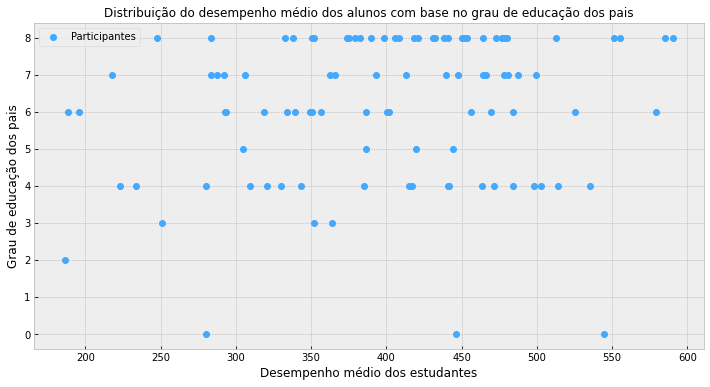

In [ ]:
# pisa2[['AGG_VALUE','AVERAGE_AREA']]
plt.style.use("bmh")
plt.figure(figsize=(12, 6))

plt.plot(pisa2['AVERAGE_AREA'][:100], pisa2['AGG_VALUE'][:100],'o', label = 'Participantes', color = '#42A9FF' )
plt.legend()
plt.title(label = "Distribuição do desempenho médio dos alunos com base no grau de educação dos pais", 
          fontsize = 12)
plt.xlabel('Desempenho médio dos estudantes')
plt.ylabel('Grau de educação dos pais')

plt.show()

<div class="alert alert-info">
<b>8</b> - É bem claro que alunos de países mais ricos têm melhores desempenhos. Em particular, como países da OCDE e fora da OCDE se comparam em relação à quantidade de livros (ST28Q01) e computadores (ST27Q03) que a família possui em casa? 
<br>Use gráficos de barra para mostrar as diferenças em cada caso (livros e computadores). Em cada gráfico, para cada valor possível (livros: 0 a 10, 11 a 25, 26 a 100 etc; computadores: 0, 1, 2 e >2), mostre as quantidades para OCDE e não OCDE.
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Diante das informações obtidas, foi identificado que <b> as famílias dos países que fazem parte da OCDE possuem mais livros e computadores</b> quando comparadas às famílias dos países que não fazem parte da OCDE. As próximas céluas apresentam como as informações foram obtidas.
</div>

In [ ]:
countriesOECDBook = (pisa2[pisa2['OECD']=='OECD']).groupby(by = 'ST28Q01')[['ST28Q01']].count()
countriesNoOECDBook = (pisa2[pisa2['OECD'] == 'Non-OECD']).groupby(by = 'ST28Q01')[['ST28Q01']].count()
countriesOECDComputer = (pisa2[pisa2['OECD'] == 'OECD']).groupby(by = 'ST27Q03')[['ST27Q03']].count()
countriesNoOECDComputer = (pisa2[pisa2['OECD'] == 'Non-OECD']).groupby(by = 'ST27Q03')[['ST27Q03']].count()

display_side_by_side (countriesOECDBook, countriesNoOECDBook, countriesOECDComputer, countriesNoOECDComputer)

,ST28Q01
ST28Q01,
0-10 books,13260
101-200 books,17807
11-25 books,16942
201-500 books,13399
26-100 books,32652
More than 500 books,7536
,ST28Q01
ST28Q01,
0-10 books,26370


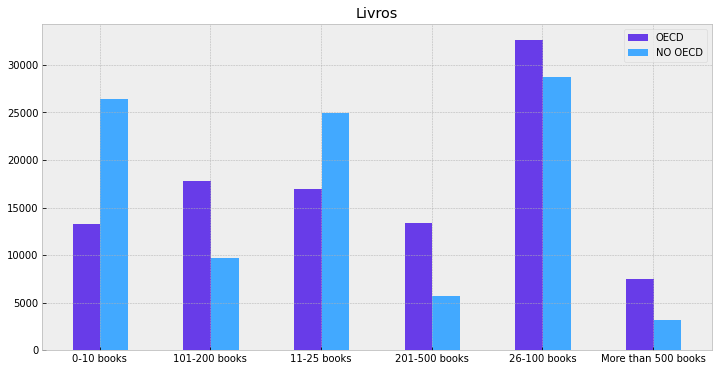

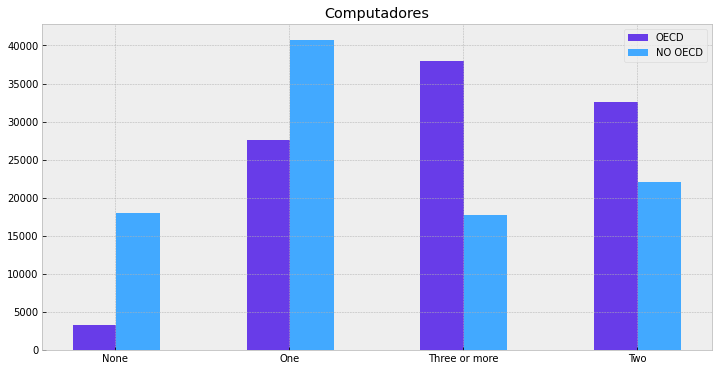

In [ ]:
# Livro OCDE x Não OCDE
plt.style.use("bmh")
plt.figure(figsize=(12, 6))

OECDBook = countriesOECDBook['ST28Q01'].tolist()
noOECDBook = countriesNoOECDBook['ST28Q01'].tolist()

x1 =  np.arange(len(OECDBook))
x2 = [x + 0.25 for x in x1]

plt.bar(x1, OECDBook, width=0.25, label = 'OECD', color = '#683CE8')
plt.bar(x2, noOECDBook, width=0.25, label = 'NO OECD', color = '#42A9FF')

books = ['0-10 books','101-200 books','11-25 books','201-500 books','26-100 books','More than 500 books']
plt.xticks([x + 0.12 for x in range(len(OECDBook))], books)

plt.legend()

plt.title("Livros")
plt.show()

# Computadores OCDE x Não OCDE
plt.style.use("bmh")
plt.figure(figsize=(12, 6))

OECDComputes = countriesOECDComputer['ST27Q03'].tolist()
noOECDComputes = countriesNoOECDComputer['ST27Q03'].tolist()

x1 =  np.arange(len(OECDComputes))
x2 = [x + 0.25 for x in x1]

plt.bar(x1, OECDComputes, width=0.25, label = 'OECD', color = '#683CE8')
plt.bar(x2, noOECDComputes, width=0.25, label = 'NO OECD', color = '#42A9FF')

books = ['None','One','Three or more','Two']
plt.xticks([x + 0.12 for x in range(len(OECDComputes))], books)

plt.legend()

plt.title("Computadores")
plt.show()

<div class="alert alert-info">
    É bem claro que alunos de países mais ricos têm melhores desempenhos. Vamos ver agora qual o impacto de certos bens como bens associados à valorização do conhecimento tem impacto sobre o desempenho dos alunos: livros, Internet e computadores. 
<br><br>
<b>9</b> - Qual a relação entre os livros que a família possui em casa e o desempenho do estudante em Matemática, Línguas e Ciência?
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Observou-se, que os alunos que possuem mais livros em casa obtêm maior pontuação nos exames, em especial nas áreas <code> <b>PV1SCIE</b></code> e <code><b>PV1READ</b></code> respectivamente. As próximas céluas apresentam como as informações foram obtidas.
</div>

In [ ]:
# Relação entre a quantidade de livros que as famílias possuem com o desempenho (média) dos alunos nos exames  
# pisa2.groupby('ST28Q01')[['PV1MATH', 'PV1READ', 'PV1SCIE']].sum()/pisa2.shape[0]
pd.pivot_table(pisa2, index = ['ST28Q01'], values = ['PV1MATH','PV1READ', 'PV1SCIE'], aggfunc = np.mean)

,PV1MATH,PV1READ,PV1SCIE
ST28Q01,,,
0-10 books,417.873509,426.206358,427.017926
101-200 books,516.495554,519.153693,522.797140
11-25 books,446.709001,454.507294,455.452599
201-500 books,543.457093,544.755964,547.239814
26-100 books,483.898751,485.771843,489.408545
More than 500 books,535.859296,533.180830,541.007183


<div class="alert alert-info">
<b>10</b> - Dada um certo número de livros, o desempenho do aluno em Matemática aumenta à medida que ele dispõe de mais computadores? Para responder esta pergunta você deve ver a relação entre três variáveis: o número de livros, o número de computadores e o desempenho médio em Matemática. <b>Use uma tabela pivô para mostrar isto.</b>
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Observou-se, que dado um certo número de livros, <b>o desempenho do aluno em Matemática aumenta à medida que ele dispõe de mais computadores</b>. A próxima célua apresenta a tabela pivô de onde as informações foram obtidas.
</div>

In [ ]:
pd.pivot_table(pisa2, index = ['ST28Q01','ST27Q03'], values = 'PV1MATH', aggfunc = np.mean)

PV1MATH
ST28Q01             ST27Q03                  
0-10 books          None           383.509676
                    One            416.002038
                    Three or more  445.079429
                    Two            438.905056
101-200 books       None           446.253890
                    One            504.856401
                    Three or more  527.329720
                    Two            520.522719
11-25 books         None           396.590508
                    One            442.238943
                    Three or more  470.636764
                    Two            465.356587
201-500 books       None           460.138774
                    One            530.888412
                    Three or more  552.179189
                    Two            543.566986
26-100 books        None           423.659371
                    One            469.573089
                    Three or more  504.693466
                    Two            497.019433
More than 500 books None           431.691139
                    One            512.870180
                    Three or more  548.900598
                    Two            537.632687

<div class="alert alert-info">
<b>11</b> - No teste de PISA de 2012, alguns países da OCDE informaram o número médio de minutos que dos alunos usando a Internet na escola para fins educacionais (IC05Q01: sem uso, até 30 minutos, de 30 a 60 min etc). Mostre a relação entre as variáveis país, tempo de uso da Internet e desempenho em Matemática. Os melhores desempenhos estão associados com mais ou menos uso da Internet? que país tem o melhor desempenho para, pelo menos, uma hora de uso da Internet? <b>Ignore os códigos de missing data nesta variável (97, 98 e 99).</b>
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Observou-se, que os países que obtiveram os melhores desempenhos em Matemática foram os que na grande maioria possuiam <code>IC05Q01 = 1</code>, ou seja, não fizeram uso da intenet na escola. A próxima célua apresenta a tabela pivô de onde a informação foi obtida.
</div>

In [ ]:
pd.pivot_table(pisa2, index = ['CNT','IC05Q01'], values = 'PV1MATH', aggfunc=np.mean).sort_values(by = 'PV1MATH', ascending = False)[:40]

PV1MATH
CNT            IC05Q01            
Poland         98       641.151267
China          1        580.890320
               2        576.805943
Taiwan         2        576.018929
               1        568.450405
               3        552.883136
Japan          1        549.599374
China          3        543.449048
Japan          2        543.288757
Czech Republic 1        532.679146
               97       532.213327
Taiwan         4        530.563615
Poland         1        528.925091
Czech Republic 2        524.227556
Poland         2        523.784885
China          4        523.768471
Latvia         98       518.769057
Czech Republic 98       518.624386
Japan          3        517.284806
               4        512.669329
Ireland        1        512.029186
Vietnam        97       511.018473
Canada         97       509.328982
Poland         97       508.566750
Italy          1        506.686707
Czech Republic 3        506.458749
Poland         3        506.020602
Ireland        2        505.601616
Taiwan         97       505.417067
Latvia         1        505.310132
China          5        504.583406
Japan          5        504.310393
China          98       503.443767
Latvia         2        502.315664
Italy          2        498.201803
Taiwan         5        498.190496
Russia         1        497.710598
Denmark        2        497.588312
               6        497.409032
               3        494.388011

<div class="alert alert-info">
<b>12</b> - As variáveis ST70Q01, ST70Q02 e ST70Q03 indicam o número de períodos de aula por semana para Línguagem, Matemática e Ciências. Como o desempenho em cada uma destas áreas varia com o respectivo número de aulas que os alunos têm? Para este exercício, agrupe 11 ou mais períodos em uma mesma categoria (11), de forma que você tenha as categorias 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 e 11.
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Observou-se, que <b>a média das pontuções nas áreas aumentam conforme o número de períodos de aula por semana</b> (agrupando em 11 períodos), exceto para a área de leitura. Neste caso, é possível observar que a melhor média para a área de leitura foi obtida quando o alunos tinham sete períodos de aula por semana: <code> PV1READ (7 períodos)</code>, <code> PV1MATH (11 períodos)</code> e <code> PV1SCIE (11 períodos)</code>.  As próximas céluas apresentam como as informações foram obtidas.
</div>

In [ ]:
def groupEleven(num):
    if num > 10:
        return 11
    else:
      return num

In [ ]:
# Reagrupamento dos períodos > 10
pisaQuestion12 = pisa2.copy()
pisaQuestion12['ST70Q01'] = pisaQuestion12['ST70Q01'].map(groupEleven)
pisaQuestion12['ST70Q02'] = pisaQuestion12['ST70Q02'].map(groupEleven)
pisaQuestion12['ST70Q03'] = pisaQuestion12['ST70Q03'].map(groupEleven)

In [ ]:
# PV1READ 
periodClassRead = pd.pivot_table(pisaQuestion12, index = ['ST70Q01'], values='PV1READ', aggfunc = np.mean)

# PV1MATH
periodClassMath = pd.pivot_table(pisaQuestion12, index = ['ST70Q02'], values='PV1MATH', aggfunc = np.mean)

# PV1SCIE
periodClassScie = pd.pivot_table(pisaQuestion12, index = ['ST70Q03'], values='PV1SCIE', aggfunc = np.mean)

display_side_by_side(periodClassRead, periodClassMath, periodClassScie)

,PV1READ
ST70Q01,
0.0,482.184757
1.0,429.938911
2.0,453.598045
3.0,474.841601
4.0,495.432893
5.0,477.347864
6.0,484.463106
7.0,503.978208
8.0,499.563854


<div class="alert alert-info">
    <b>13</b> - A variável ST57Q01 indica o tempo dedicado pelos alunos para tarefas em casa. Como o desempenho em Línguagem, Matemática e Ciências varia com este tempo dedicado pelos alunos? Como antes, para este exercício, agrupe 11 ou mais em uma mesma categoria (11), de forma que você tenha as categorias 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 e 11.
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Observou-se, que <b>a média das pontuções nas áreas aumentam conforme o tempo dedicado pelos alunos em casa</b> (agrupando em 11 períodos). Os maiores valores foram <code> PV1READ = 540.0514(11) </code>, <code> PV1MATH = 535.9416(11) </code> e <code> PV1SCIE = 537.8162(11)</code>. A próxima célula apresenta como as informações foram obtidas.
</div>

In [ ]:
# Reagrupamento dos períodos > 10
pisaQuestion13 = pisa2.copy()
pisaQuestion13['ST57Q01'] = pisaQuestion13['ST57Q01'].map(groupEleven)

In [ ]:
#PV1READ
dedicateTimeHouseRead = pd.pivot_table(pisaQuestion13, values = 'PV1READ', index = 'ST57Q01', aggfunc = np.mean)

#PV1MATH
dedicateTimeHouseMath = pd.pivot_table(pisaQuestion13, values = 'PV1MATH', index = 'ST57Q01', aggfunc = np.mean)

#PV1SCIE
dedicateTimeHouseScie = pd.pivot_table(pisaQuestion13, values = 'PV1SCIE', index = 'ST57Q01', aggfunc = np.mean)

display_side_by_side(dedicateTimeHouseRead, dedicateTimeHouseMath, dedicateTimeHouseScie)

,PV1READ
ST57Q01,
0.0,441.568329
1.0,442.717719
2.0,456.097161
3.0,475.262212
4.0,485.060159
5.0,488.838609
6.0,473.911176
7.0,511.693004
8.0,512.399309


<div class="alert alert-info">
<b>14</b> - Como varia o desempenho dos alunos em Matemática, Linguagens e Ciências com a sua idade? Para esta questão, você deve criar a variável AGE que indica a idade do aluno na época do teste (2012).   
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Depois de agrupar os participantes pela idade (atributo AGE), <b>observou-se que os participantes com dezesseis anos obtiveram as melhores pontuações nos exames</b>. A próxima célula apresenta como as informações foram obtidas.
</div>

In [ ]:
# Criação da Coluna AGE (diferença entre o ano do teste com o ano de nascimento do participante)
pisa2['AGE'] = 2012 - pisa2['ST03Q02']
pd.pivot_table(pisa2, values = ['PV1MATH', 'PV1READ', 'PV1SCIE'], index = ['AGE'], aggfunc = np.mean)

,PV1MATH,PV1READ,PV1SCIE
AGE,,,
15,463.289779,476.371784,477.297654
16,476.791742,480.412416,483.152783


## Classificando Dados

<div class="alert alert-info">
<b>15</b> - Prepare os dados para prever se um dado aluno vai receber uma nota acima ou abaixo da média em Matemática. Para tanto:
    <ul>
    <li>Crie a variável TARGET com valor 1 para alunos com nota maior que a média global em Matemática; 0, em caso contrário; 
    <li>Remova as variáveis PV1MATH, PV1READ, PV1SCIE e outras que você possa ter criado e não acredita que sejam pertinentes para esta previsão;
    <li>Transforme variáveis do tipo "object" em categóricas inteiras;        
    <li>Padronize variáveis reais (usando Z-score);   
    <li>Garanta que variáveis numéricas não incluam NaN, após normalização;
    </ul>
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : As células abaixo apresentam toda a execução dos passos solicitados pela <code><b>questão 15</b></code>.
</div>

In [ ]:
# Cria a coluna  TARGET com base no critério apresentado pelo problema (1º bullet).
pisa2['TARGET'] = np.where(pisa2['PV1MATH'] > pisa2['PV1MATH'].mean() , 1, 0)

In [ ]:
'''
pisa3 recebe o dataset já com a remoção das variáveis (atributos) PV1MATH, PV1READ, PV1SCIE e outros atributos 
criados durante a execução da atividade, segue com base no critério apresentado pelo problema (2º bullet).
'''
pisa3 = pisa2.drop(columns = ['PV1MATH', 'PV1READ', 'PV1SCIE','AGG_VALUE', 'AVERAGE_AREA', 'AGE'])

In [ ]:
# Transforma variáveis do tipo "object" em categóricas inteiras (3º bullet).

# Cria uma lista com todas as colunas do tipo 'object'.
colTypeObject = pisa3.select_dtypes(include='object').columns.tolist()

# Converte as colunas do tipo 'object' para o tipo 'category'.
pisa3[colTypeObject] = pisa3[colTypeObject].astype('category') 

# Cria uma lista com todas as colunas do tipo 'category'.
colTypeCategory = pisa3.select_dtypes(include='category').columns.tolist()

In [ ]:
# Converte todas as colunas do tipo 'category' para categóricas inteiras
for column in colTypeCategory:
  pisa3.loc[:, column] = pisa3.loc[:, column].cat.codes

In [ ]:
# Padronização das variáveis reais (usando Z-score) (4º bullet).

# Cria uma lista com todas as colunas do tipo 'float64'.
colTypeFloat = pisa3.select_dtypes(include = 'float64').columns.tolist()

# Aplica o Z-score nos atributos de tipo real
pisa3[colTypeFloat] = stats.zscore(pisa3[colTypeFloat])

In [ ]:
# Verificação de existência de variáveis numéricas que incluam NaN, após normalização (4º bullet).

checkForNan = pisa3.isna().values.any()
checkForNull = pisa3.isnull().values.any()

print('isna(): ',checkForNan, '\nisnull(): ',checkForNull)

isna():  False 
isnull():  False


<div class="alert alert-info">
<b>16</b> - Crie um modelo de classificação para variável TARGET usando uma floresta aletória. Crie o modelo usando 70% dos estudantes para treino e 30% para teste. Avalie o resultado do seu classificador exibindo a matriz de confusão obtida na coleção de teste.    
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : As células abaixo apresentam toda a execução dos passos solicitados pela <code> <b>questão 16</b></code>.
</div>

In [ ]:
# Criação da base de treinamento e de testes, respectivamente 70% e 30%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pisa3.drop(['TARGET'], axis = 'columns'), pisa3['TARGET'], test_size = 0.3) 

In [ ]:
# Configuração e execução do modelo de classificação floresta aleatória.
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Pontução do modelo treinado.
model.score(X_test,y_test)

0.8023288743773843

Text(27.5, 0.5, 'Verdade')

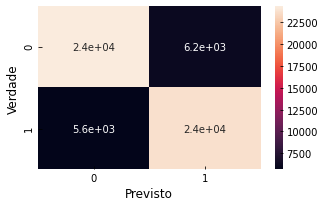

In [ ]:
# Avaliação do resultado do classificador pela matriz de confusão obtida na coleção de teste.
from sklearn.metrics import confusion_matrix
import seaborn as sn

yPredicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, yPredicted)

plt.figure(figsize = (5,3))
sn.heatmap(confusionMatrix, annot = True)
plt.xlabel('Previsto')
plt.ylabel('Verdade')

<div class="alert alert-info">
<b>17</b> - Usando o atributo feature_importances_ da Floresta Aleatória, ordene os atributos usados de acordo com quão importante eles foram para a classificacão. Quais foram os dez mais importantes?   
</div>

<div class="alert alert-info" align="justify">
    <b>Resposta</b> : Com base no que foi observado, o modelo considerou os seguintes atributos como mais importantes, segue os dez mais importantes: 
    <code><b>CNT</b></code> >
    <code><b>ST28Q01</b></code> > 
    <code><b>ST57Q01</b></code> > 
    <code><b>IC06Q01</b></code> > 
    <code><b>IC05Q01</b></code> > 
    <code><b>IC07Q01</b></code> > 
    <code><b>ST13Q01</b></code> >
    <code><b>ST27Q03</b></code> >
    <code><b>ST03Q01</b></code> >
    <code><b>ST72Q01</b></code>. Para mais detalhes sobre a pontuação (de importância) dos atributos e como foram obtidas as informações, as próximas células podem ser consultadas. 
</div>

In [ ]:
# Criando um Dataframe com as colunas e seus scores:

# Nome das colunas utilizadas pelo classificador.
colNames = pisa3.drop('TARGET', axis = 'columns').columns.tolist()


featureImportances = pd.DataFrame(model.feature_importances_,
                                  index = colNames,
                                  columns=['importance']).sort_values('importance', ascending=False)
featureImportances[:10]

,importance
CNT,0.058510
ST28Q01,0.032706
ST57Q01,0.023440
IC06Q01,0.022872
IC05Q01,0.022360
IC07Q01,0.021806
ST13Q01,0.019217
ST27Q03,0.019157
ST03Q01,0.019156
ST72Q01,0.018190
